In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

with open("tomtom-traffic-data.json", 'r') as file:
    data = json.load(file)

df_segment_results = pd.json_normalize(data['network']['segmentResults'],
                                        record_path='segmentTimeResults',
                                        meta=['segmentId', 'newSegmentId', 'speedLimit', 'frc', 'streetName', 'distance'],errors='ignore')

df_segment_results = df_segment_results[['harmonicAverageSpeed','standardDeviationSpeed','averageSpeed','averageTravelTime','speedLimit','streetName','distance','frc']]
# print(df_segment_results)

In [2]:
df_segment_results.dtypes

harmonicAverageSpeed      float64
standardDeviationSpeed    float64
averageSpeed              float64
averageTravelTime         float64
speedLimit                 object
streetName                 object
distance                   object
frc                        object
dtype: object

In [3]:
df_segment_results['distance'] = df_segment_results['distance'].astype(float)
df_segment_results['speedLimit'] = df_segment_results['speedLimit'].astype(float)
df_segment_results['frc'] = df_segment_results['frc'].astype(float)

In [4]:
street_group = df_segment_results.groupby('streetName').mean()

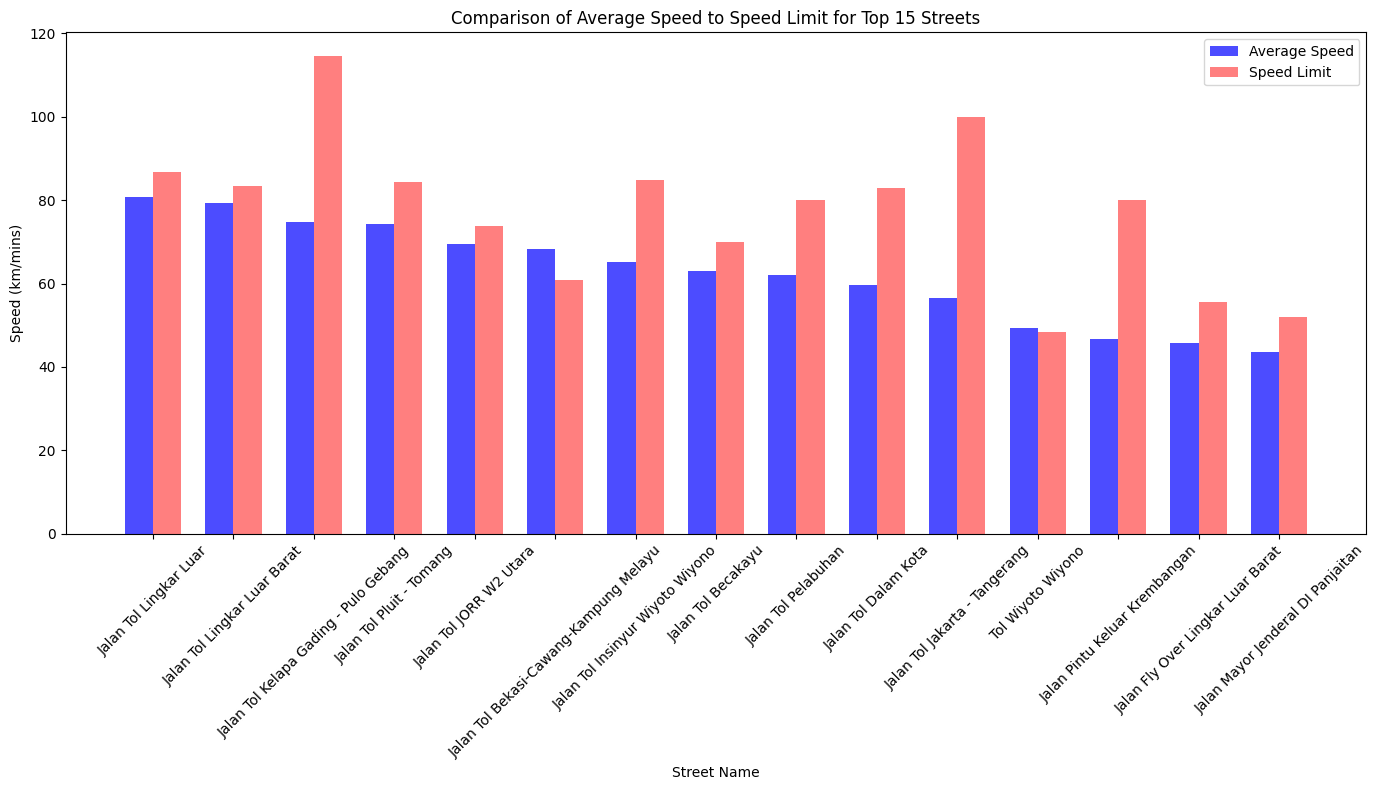

In [5]:
top_15_streets = street_group.sort_values(by='averageSpeed', ascending=False).head(15)
# Define positions for bars
bar_width = 0.35
index = np.arange(len(top_15_streets))

plt.figure(figsize=(14, 8))

# Use the bar_width and index to set the positions
bars1 = plt.bar(index, top_15_streets['averageSpeed'], bar_width, label='Average Speed', color='blue', alpha=0.7)
bars2 = plt.bar(index + bar_width, top_15_streets['speedLimit'], bar_width, label='Speed Limit', color='red', alpha=0.5)

# Adjust the x-axis
plt.xlabel('Street Name')
plt.ylabel('Speed (km/mins)')
plt.title('Comparison of Average Speed to Speed Limit for Top 15 Streets')
plt.xticks(index + bar_width / 2, top_15_streets.index, rotation=45)  # Align the street names in the center of the grouped bars
plt.legend()
plt.tight_layout()
plt.show()


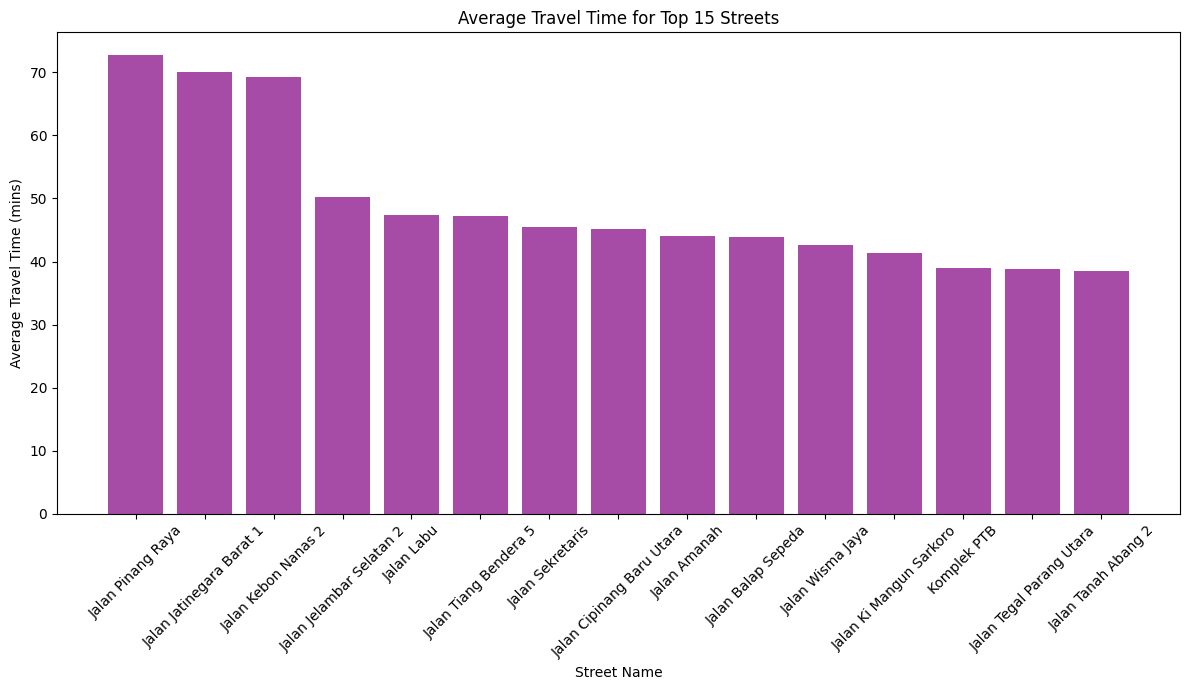

In [6]:
# Sorting the grouped DataFrame by averageTravelTime in descending order and taking the top 15
top_15_travel_time_streets = street_group.sort_values(by='averageTravelTime', ascending=False).head(15)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.bar(top_15_travel_time_streets.index, top_15_travel_time_streets['averageTravelTime'], color='purple', alpha=0.7)
plt.xlabel('Street Name')
plt.ylabel('Average Travel Time (mins)')
plt.title('Average Travel Time for Top 15 Streets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure everything fits well
plt.show()


In [7]:
# Sorting the grouped DataFrame by averageSpeed in descending order and taking the top 15
top_15_frc = frc_group.sort_values(by='averageSpeed', ascending=False).head(8)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.bar(top_15_frc.index, top_15_frc['averageSpeed'], color='green', alpha=0.7)
plt.xlabel('Functional Road Class (FRC)')
plt.ylabel('Average Speed (km/mins)')
plt.title('Average Speed for ALL FRCs')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility if needed
plt.tight_layout()  # Ensure everything fits well
plt.show()


NameError: name 'frc_group' is not defined

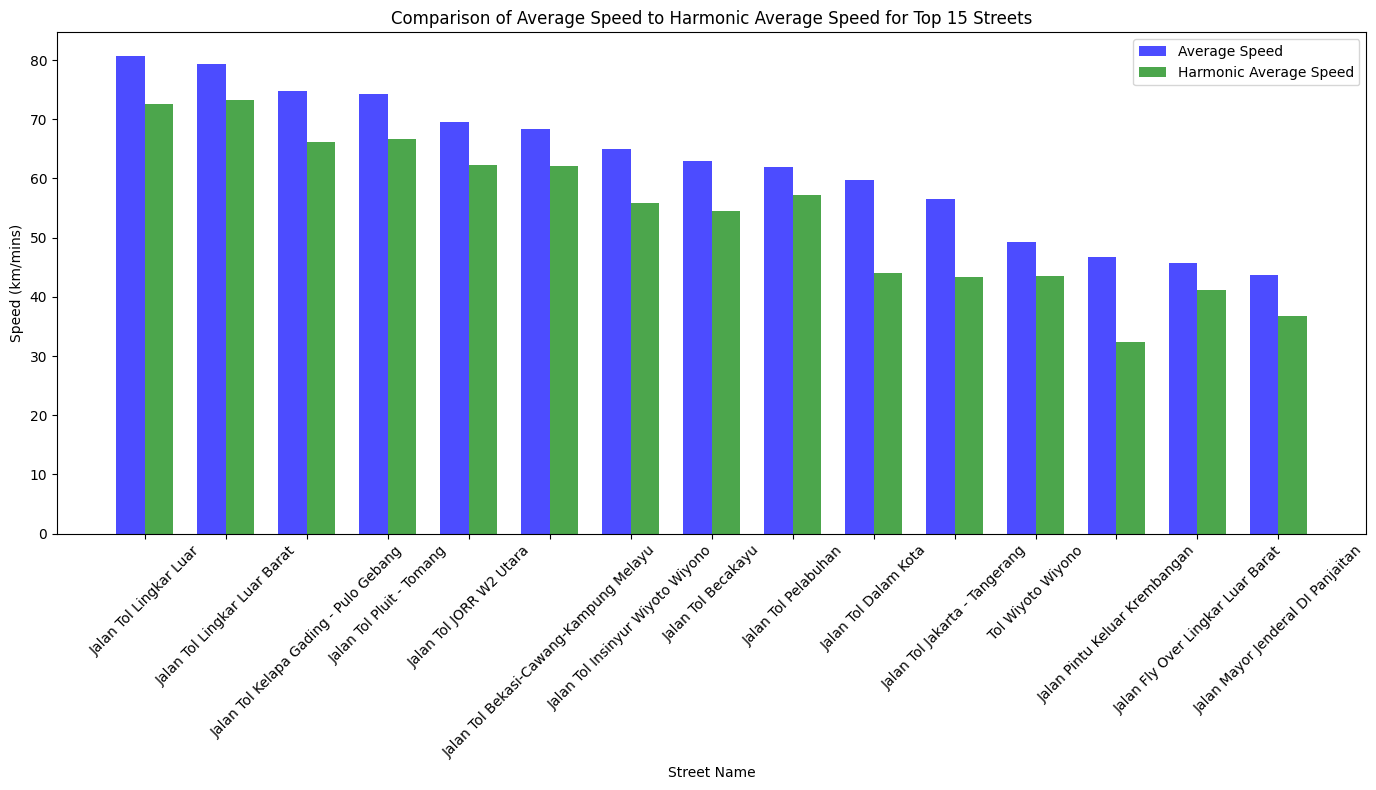

In [ ]:
# Average Speed vs Harmonic Average Speed:
# This can provide insights into the frequency of slow-moving traffic.
# This is an average that gives more weight to lower speeds. It's often used in traffic analysis
# because it's more sensitive to slow speeds than the arithmetic average.
# Comparing this to the arithmetic average speed can provide insights into the extent of slow-moving traffic.

plt.figure(figsize=(14, 8))

# Define positions for bars
bar_width = 0.35
index = np.arange(len(top_15_streets))

# Plot bars
plt.bar(index, top_15_streets['averageSpeed'], width=bar_width, label='Average Speed', color='blue', alpha=0.7)
plt.bar(index + bar_width, top_15_streets['harmonicAverageSpeed'], width=bar_width, label='Harmonic Average Speed', color='green', alpha=0.7)

# Adjust the x-axis
plt.xlabel('Street Name')
plt.ylabel('Speed (km/mins)')
plt.title('Comparison of Average Speed to Harmonic Average Speed for Top 15 Streets')

# Notice here: we use the top_15_streets.index directly for the tick labels
plt.xticks(index + bar_width / 2, top_15_streets.index, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


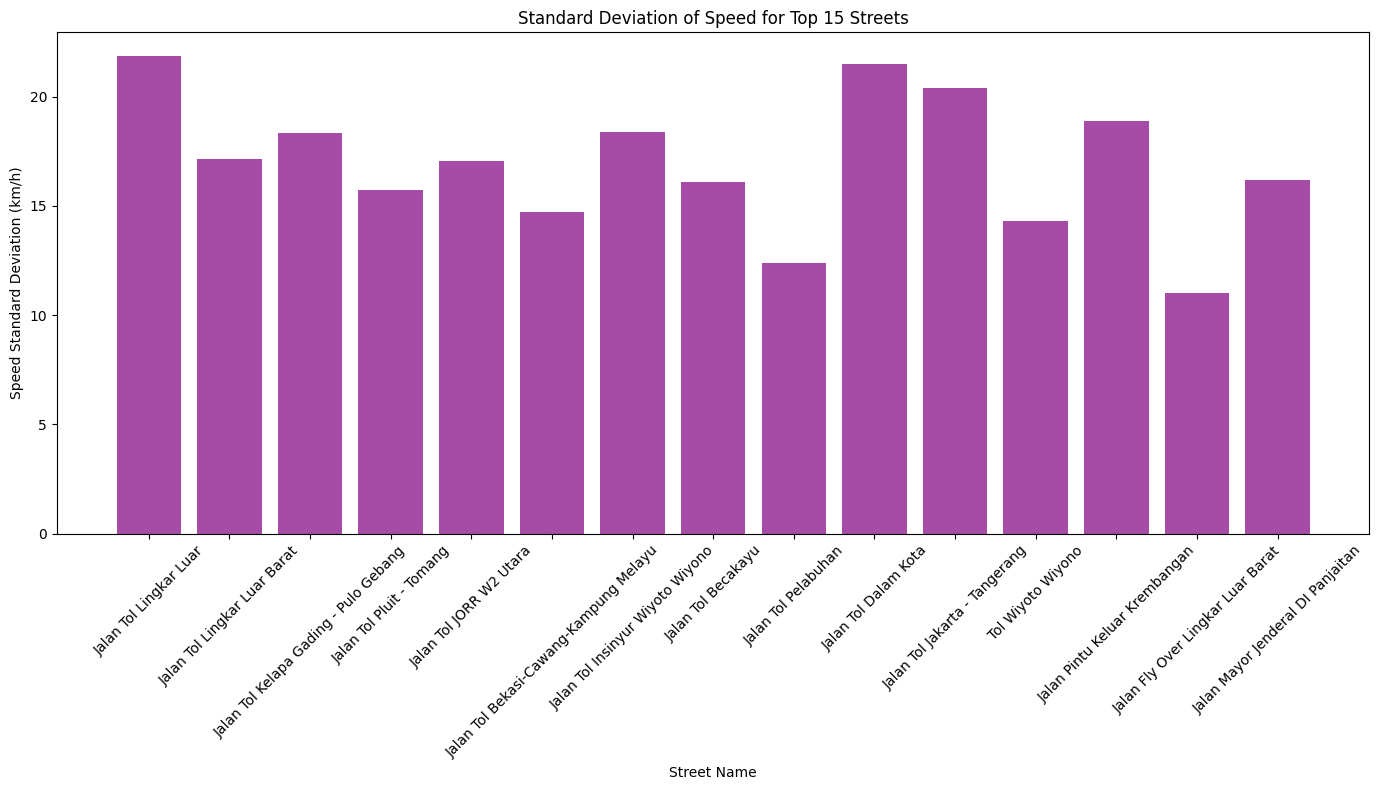

In [ ]:
# To visualize the variability in speeds across streets.

plt.figure(figsize=(14, 8))
plt.bar(top_15_streets.index, top_15_streets['standardDeviationSpeed'], color='purple', alpha=0.7)
plt.xlabel('Street Name')
plt.ylabel('Speed Standard Deviation (km/h)')
plt.title('Standard Deviation of Speed for Top 15 Streets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
